# Robust PCA Example

Robust PCA is an awesome relatively new method for factoring a matrix into a low rank component and a sparse component.  This enables really neat applications for outlier detection, or models that are robust to outliers.

In [209]:
%matplotlib inline

### Make Some Toy Data

In [210]:
import matplotlib.pyplot as plt
import numpy as np

In [211]:
def mk_rot_mat(rad=np.pi / 4):
    rot = np.array([[np.cos(rad),-np.sin(rad)], [np.sin(rad), np.cos(rad)]])
    return rot

In [212]:
rot_mat = mk_rot_mat( np.pi / 4)
x = np.random.randn(100) * 5
y = np.random.randn(100)
points = np.vstack([y,x])

In [213]:
rotated = np.dot(points.T, rot_mat).T

### Add Some Outliers to Make Life Difficult

In [214]:
outliers = np.tile([15,-10], 10).reshape((-1,2))

In [215]:
pts = np.vstack([rotated.T, outliers]).T

### Compute SVD on both the clean data and the outliery data

In [216]:
U,s,Vt = np.linalg.svd(rotated)
U_n,s_n,Vt_n = np.linalg.svd(pts)

### Just 10 outliers can really screw up our line fit!

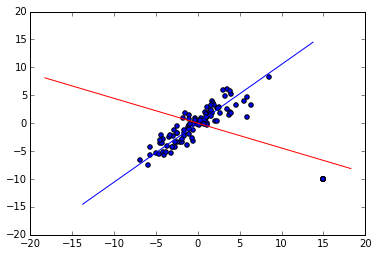

In [217]:
plt.ylim([-20,20])
plt.xlim([-20,20])
plt.scatter(*pts)
pca_line = np.dot(U[0].reshape((2,1)), np.array([-20,20]).reshape((1,2)))
plt.plot(*pca_line)
rpca_line = np.dot(U_n[0].reshape((2,1)), np.array([-20,20]).reshape((1,2)))
plt.plot(*rpca_line, c='r')

### Now the robust pca version!

In [218]:
import tga

In [219]:
reload(tga)

<module 'tga' from 'tga.pyc'>

In [220]:
import logging
logger = logging.getLogger(tga.__name__)
logger.setLevel(logging.INFO)

### Factor the matrix into L (low rank) and S (sparse) parts

In [227]:
X = pts.copy()
v = tga.tga(X.T, eps=1e-5, k=1, p=0.0)

### And have a look at this!

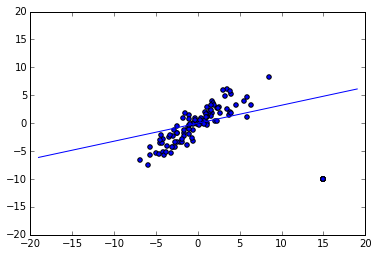

In [228]:
plt.ylim([-20,20])
plt.xlim([-20,20])
plt.scatter(*pts)
tga_line = np.dot(v[0].reshape((2,1)), np.array([-20,20]).reshape((1,2)))
plt.plot(*tga_line)
#plt.scatter(*L, c='red')